# APRENDIZAJE AUTOMÁTICO
# Práctica 1: Regresión
### Autor: Yoldi Vigueras, Jaime
### NIP:   779057
### Fecha: 05-02-2025
---



## Configuración

In [10]:
%matplotlib inline
try:
  from google.colab import drive
  print("Trabajando en Colab")
  drive.mount('/content/drive')                # Monta tu google drive
  Path = '/content/drive/MyDrive/Aprendizaje/P1/Datos/' # Directorio donde guardas los ficheros
except:
  print("Trabajando en local")
  Path = ''                                    # Directorio donde guardas los ficheros

Trabajando en Colab
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---
## 0. Visualización de datos

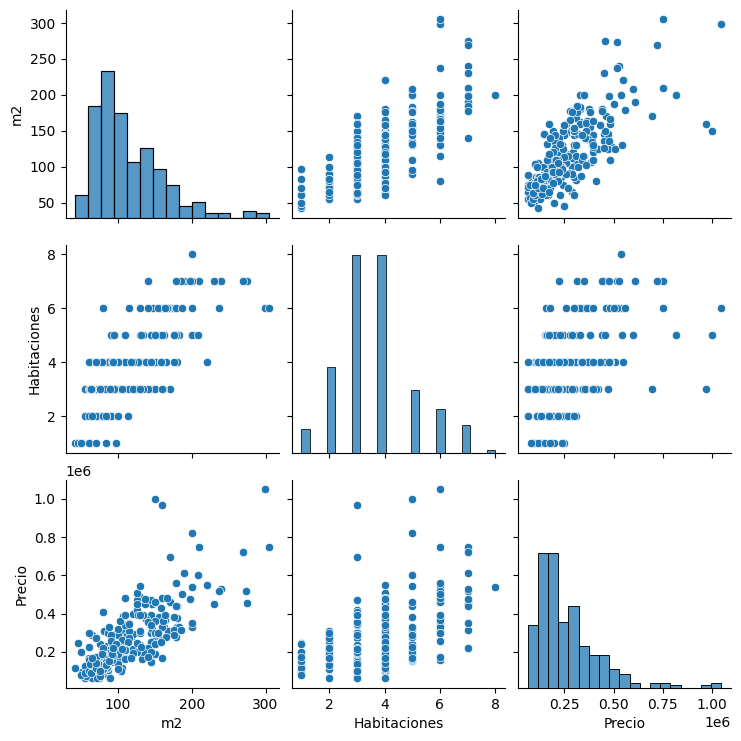

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

# Leer los ficheros de datos y pasarlos a matrices de numpy
pisos_train = pd.read_csv(Path+'PisosTrain.csv', sep = ";")
x1_train = pisos_train["m2"].to_numpy().reshape(-1, 1)
x2_train = pisos_train["Habitaciones"].to_numpy().reshape(-1, 1)
y_train  = pisos_train["Precio"].to_numpy()

pisos_test  = pd.read_csv(Path+'PisosTest.csv',  sep = ";")
x1_test = pisos_test["m2"].to_numpy().reshape(-1, 1)
x2_test = pisos_test["Habitaciones"].to_numpy().reshape(-1, 1)
y_test  = pisos_test["Precio"].to_numpy()

# Mostrar los datos de entrenamiento
seaborn.pairplot(pisos_train)
plt.show()

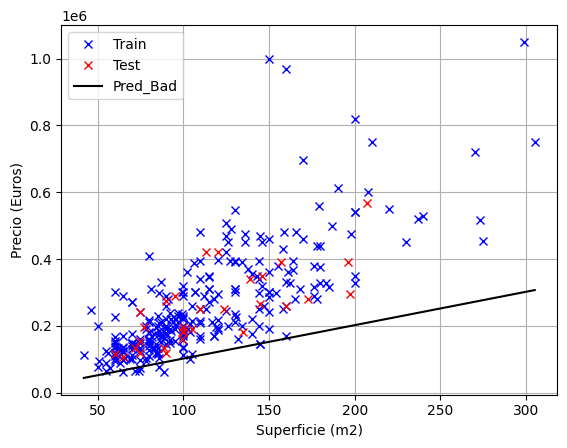

In [12]:
# Ejemplo de dibujo de un atributo y una prediccion inventada
x1_grid = np.linspace(np.min(x1_train), np.max(x1_train), 100).reshape(-1, 1)
y_grid_pred = x1_grid *1000 + 2000  # Prediccion inventada

plt.figure()
plt.plot(x1_train, y_train, 'bx', label='Train')
plt.plot(x1_test, y_test,  'rx', label='Test')
plt.plot(x1_grid, y_grid_pred, 'k-', label='Pred_Bad')
plt.xlabel('Superficie (m2)')
plt.ylabel('Precio (Euros)')
plt.legend()
plt.grid()
plt.show()


Aquí explico las conclusiones que he sacado analizando los datos.

---
## 1. Métricas

Las metricas que se van a utilizar para evaluar los modelos van a ser el error cuadratico medio (MSE) y el coeficiente de terminacion R² (R-square).  Ambas medidas son utilizadas para la evaluacion de modelos y conocer como se comportan los predictores con los datos.Estas tienen una funcion de sklearn que permite calcularlas facilmente.

Tambien se a incluido el error absoluto medio, una medida que esta en la misma escala de las prediciones; al contrario que el MSE, que se encuentra en euro²;
y que  R², que no tiene unidad; lo que simplifica ciertas comparaciones.

Con ayuda de gemini se ha implementado esta funcion que calcula estas metricas, las muestra por pantalla si se desea y las guarada en una estructura Data Frame.

In [2]:

import pandas as pd
resultadosEntrenamiento = pd.DataFrame(columns=['nombre', 'MSE', 'r2', 'MAE'])
resultadosTest = pd.DataFrame(columns=['nombre', 'MSE', 'r2', 'MAE'])

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

def obtenerMetricas(predictor, x_test, y_test,  name, isTrain = True, verbose = True):
  y_pred = predictor.predict(x_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  if verbose:
    print(f"Error Cuadrático Medio (MSE): {mse}")
    print(f"R-cuadrado (R²): {r2}")
    print(f"Raiz del MSE :  {np.sqrt(mse)}")
    print(f"Error Absoluto Medio (MAE): {mae}")
  if isTrain:
    resultadosEntrenamiento.loc[len(resultadosEntrenamiento)] = [name, mse, r2, mae]
  else:
    resultadosTest.loc[len(resultadosTest)] = [name, mse, r2, mae]
  return mse, r2, mae

Ademas de la funcion metricas se han diseñado con ayuda de Gemini 2 funciones para mostrar graficamente los valores que predice el sistema y como de lejos estan de los datos de test

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualizar2D (predictor, x1_test, valores_reales):
  y_pred = predictor.predict(x1_test)
  plt.figure()
  plt.plot(x1_test, valores_reales, 'rx', label='Test')
  plt.plot(x1_test, y_pred, 'k-', label='Predicciones')
  plt.xlabel('Superficie (m2)')
  plt.ylabel('Precio (Euros)')
  plt.legend()
  plt.grid()
  plt.show()


#se muestra un plano con los valores predichos para todo el rango de valores y puntos
#donde se encuentran los valores reales unidos al plano por el punto que indica el valor predicho
def visualizar3D (predictor, entradas, valores_reales):
  # Crear la figura y el objeto Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  # Obtener los valores mínimos y máximos de x1 y x2 de los datos de prueba
  x1_min = np.min(entradas[:, 0])  # Columna 0 de entradas (m2)
  x1_max = np.max(entradas[:, 0])
  x2_min = np.min(entradas[:, 1])  # Columna 1 de entradas (Habitaciones)
  x2_max = np.max(entradas[:, 1])

  # Crear una malla para el plano de predicciones
  x1_range = np.arange(x1_min, x1_max, 10)  # Ajusta el paso según sea necesario
  x2_range = np.arange(x2_min, x2_max, 1)   # Ajusta el paso según sea necesario
  x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

  # Predecir valores para la malla
  x_grid = np.stack([x1_grid.ravel(), x2_grid.ravel()], axis=1)
  y_grid_pred = predictor.predict(x_grid)
  y_grid_pred = y_grid_pred.reshape(x1_grid.shape)  # Redimensionar para coincidir con la malla

  # Graficar el plano de predicciones
  ax.plot_surface(x1_grid, x2_grid, y_grid_pred, alpha=0.5)  # alpha controla la transparencia

  # Predecir valores para los puntos de prueba
  y_pred = predictor.predict(entradas)

  # Crear una máscara para los puntos con precio menor que el predicho
  mask_lower = valores_reales < y_pred

  # Graficar los puntos de datos reales, separando por color
  ax.scatter(entradas[mask_lower, 0], entradas[mask_lower, 1], valores_reales[mask_lower], color='yellow', marker='o', label='Precio menor que predicho')
  ax.scatter(entradas[~mask_lower, 0], entradas[~mask_lower, 1], valores_reales[~mask_lower], color='red', marker='o', label='Precio mayor o igual que predicho')

   # Dibujar líneas entre los puntos reales y los predichos
  for i in range(len(entradas)):
    ax.plot([entradas[i, 0], entradas[i, 0]], [entradas[i, 1], entradas[i, 1]], [valores_reales[i], y_pred[i]], color='gray', linestyle='--', alpha=0.5)

   # Dibujar 'x' en los puntos predichos en el plano
  ax.scatter(entradas[:, 0], entradas[:, 1], y_pred, marker='x', color='black', s=40, label='Predicciones')  # Ajusta el color y el tamaño según sea necesario


  # Ajustes del gráfico
  ax.set_xlabel('Superficie (m2)')
  ax.set_ylabel('Habitaciones')
  ax.set_zlabel('Precio (Euros)')
  ax.legend()
  ax.view_init(elev=30, azim=60)
  plt.show()




Con estas funciones y ayuda de Gemini para conocer las clases adecuadas para cada tipo de predictor y los distintos parmetros que se pueden ajustar en estos se han entrenado varios modelos segun las indicacionse de la practica y recogido sus metricas para compararlas posteriormente.

----
## 2. Regresión Monovariable

Metricas con datos de train
Error Cuadrático Medio (MSE): 10555447613.09567
R-cuadrado (R²): 0.5835464913156323
Raiz del MSE :  102739.70806409599
Error Absoluto Medio (MAE): 69534.93000239348
Metricas con datos de test
Error Cuadrático Medio (MSE): 6500962224.887705
R-cuadrado (R²): 0.4608909883530128
Raiz del MSE :  80628.54472758209
Error Absoluto Medio (MAE): 63936.47453907921
Ecuación de la regresión: y = 2608.21x + -34313.39


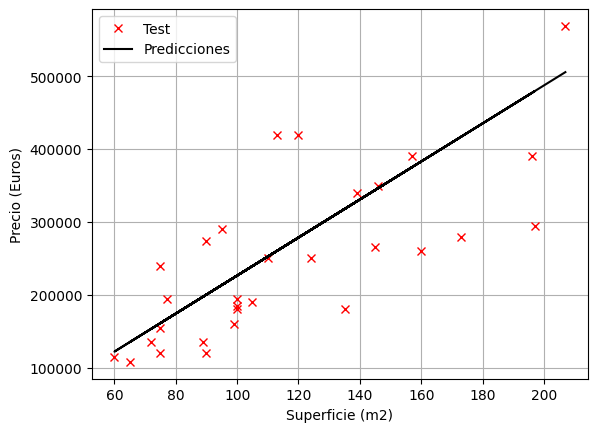

In [30]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(x1_train, y_train)

# Calculo las metricas
print('==============================')
print('Metricas con datos de train')
obtenerMetricas(modelo,x1_train, y_train, "monovariable")
print('==============================')
print('Metricas con datos de test')
obtenerMetricas(modelo, x1_test, y_test,  "monovariable", isTrain=False)

# muestro la ecuacion que se usa para predecir
m = modelo.coef_[0]  # Pendiente
b = modelo.intercept_  # Intersección

print(f"Ecuación de la regresión: y = {m:.2f}x + {b:.2f}")

visualizar2D(modelo, x1_test, y_test)


Aquí explico y analizo los resultados obtenidos.

----

## 3. Regresión Multivariable Simple


Metricas con datos de train
Error Cuadrático Medio (MSE): 10264594868.613026
R-cuadrado (R²): 0.5950217645953746
Raiz del MSE :  101314.33693516937
Error Absoluto Medio (MAE): 69089.30442515496
Metricas con datos de test
Error Cuadrático Medio (MSE): 5586146700.128626
R-cuadrado (R²): 0.5367544184625004
Raiz del MSE :  74740.52916676886
Error Absoluto Medio (MAE): 55256.44082483397
Ecuación de la regresión: y = 3028.74x + -18852.83 + -12132.91


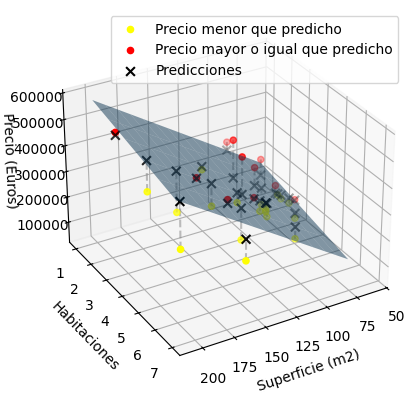

In [31]:
from sklearn.linear_model import LinearRegression
import numpy as np

#combinamos los datos
X_train = np.concatenate((x1_train, x2_train), axis=1)
X_test = np.concatenate((x1_test, x2_test), axis=1)
# Crear y entrenar el modelo
modeloRegrsionMultivariable = LinearRegression()
modeloRegrsionMultivariable.fit(X_train, y_train)

# Calculo las metricas
print('==============================')
print('Metricas con datos de train')
obtenerMetricas(modeloRegrsionMultivariable, X_train, y_train, 'RegrsionMultivariable')
print('==============================')
print('Metricas con datos de test')
obtenerMetricas(modeloRegrsionMultivariable, X_test, y_test, 'RegrsionMultivariable', isTrain=False)

# muestro la ecuacion que se usa para predecir
m1 = modeloRegrsionMultivariable.coef_[0]  # Pendiente 1
m2 = modeloRegrsionMultivariable.coef_[1]  # Pendiente 2
b = modeloRegrsionMultivariable.intercept_  # Intersección

print(f"Ecuación de la regresión: y = {m1:.2f}x + {m2:.2f} + {b:.2f}")

visualizar3D(modeloRegrsionMultivariable, X_test, y_test)


----

## 4. Regresión Multivariable Descenso de Gradiente

Metricas con datos de train
Error Cuadrático Medio (MSE): 10265746550.266478
R-cuadrado (R²): 0.5949763262697774
Raiz del MSE :  101320.02048098134
Error Absoluto Medio (MAE): 69007.44521125453
Metricas con datos de test
Error Cuadrático Medio (MSE): 5591221214.92977
R-cuadrado (R²): 0.5363336012719988
Raiz del MSE :  74774.4690046661
Error Absoluto Medio (MAE): 55629.388698486495


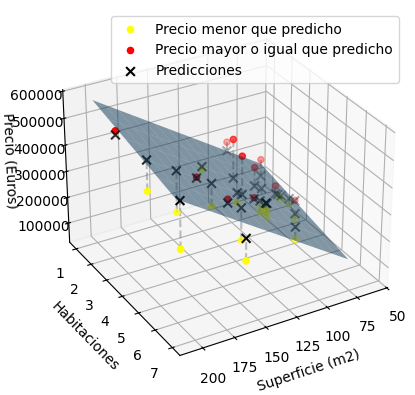

In [32]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
import numpy as np

# Crear el pipeline con StandardScaler y SGDRegressor
modeloDescensoGradiente = make_pipeline(StandardScaler(),SGDRegressor())

# Entrenar el modelo
modeloDescensoGradiente.fit(X_train, y_train)

# Calculo las metricas
print('==============================')
print('Metricas con datos de train')
obtenerMetricas(modeloDescensoGradiente, X_train, y_train,'DescensoGradiente')
print('==============================')
print('Metricas con datos de test')
obtenerMetricas(modeloDescensoGradiente, X_test, y_test, 'DescensoGradiente' , isTrain=False)

visualizar3D(modeloDescensoGradiente, X_test, y_test)

----

## 5. Regresión Robusta Huber

Metricas con datos de train
Error Cuadrático Medio (MSE): 10698688433.11278
R-cuadrado (R²): 0.5778950832210157
Raiz del MSE :  103434.46443576134
Error Absoluto Medio (MAE): 67934.79631500138
Metricas con datos de test
Error Cuadrático Medio (MSE): 5027895591.967575
R-cuadrado (R²): 0.5830488273146819
Raiz del MSE :  70907.65538337575
Error Absoluto Medio (MAE): 55158.30129779464


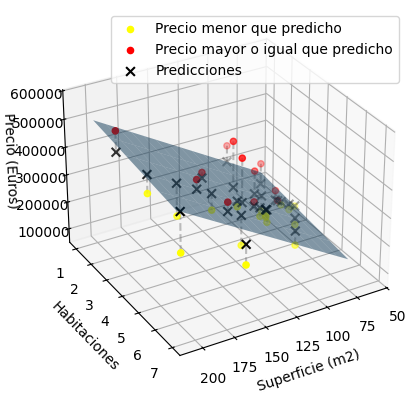

In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import HuberRegressor

# Crear el pipeline con StandardScaler y HuberRegressor
modeloRegresionRobusta = make_pipeline(StandardScaler(),HuberRegressor(epsilon=1.35))

# Entrenar el modelo
modeloRegresionRobusta.fit(X_train, y_train)

# Calculo las metricas
print('==============================')
print('Metricas con datos de train')
obtenerMetricas(modeloRegresionRobusta, X_train, y_train, 'RegresionRobusta')
print('==============================')
print('Metricas con datos de test')
obtenerMetricas(modeloRegresionRobusta, X_test, y_test, 'RegresionRobusta', isTrain=False)

visualizar3D(modeloRegresionRobusta, X_test, y_test)

----

## 6. Redes neuronales

Metricas con datos de train
Error Cuadrático Medio (MSE): 10264594868.62142
R-cuadrado (R²): 0.5950217645950434
Raiz del MSE :  101314.3369352108
Error Absoluto Medio (MAE): 69089.29760504802
Metricas con datos de test
Error Cuadrático Medio (MSE): 5586145803.723279
R-cuadrado (R²): 0.536754492799219
Raiz del MSE :  74740.52316998644
Error Absoluto Medio (MAE): 55256.46823700149


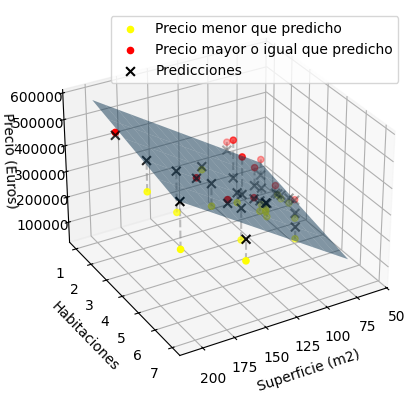

In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

# Crear el pipeline con StandardScaler y HuberRegressor
modeloSinCapaOculta = make_pipeline(StandardScaler(),MLPRegressor(hidden_layer_sizes=(), activation='identity', solver='lbfgs', max_iter=5000))

# Entrenar el modelo
modeloSinCapaOculta.fit(X_train, y_train)

# Calculo las metricas
print('==============================')
print('Metricas con datos de train')
obtenerMetricas(modeloSinCapaOculta, X_train, y_train, 'SinCapaOculta')
print('==============================')
print('Metricas con datos de test')
obtenerMetricas(modeloSinCapaOculta, X_test, y_test, 'SinCapaOculta', isTrain=False)

visualizar3D(modeloSinCapaOculta, X_test, y_test)

Metricas con datos de train
Error Cuadrático Medio (MSE): 9796754989.633446
R-cuadrado (R²): 0.6134798694759098
Raiz del MSE :  98978.55823173748
Error Absoluto Medio (MAE): 67127.30378413656
Metricas con datos de test
Error Cuadrático Medio (MSE): 6624326139.846859
R-cuadrado (R²): 0.45066071843821076
Raiz del MSE :  81389.96338521635
Error Absoluto Medio (MAE): 64748.64753838717


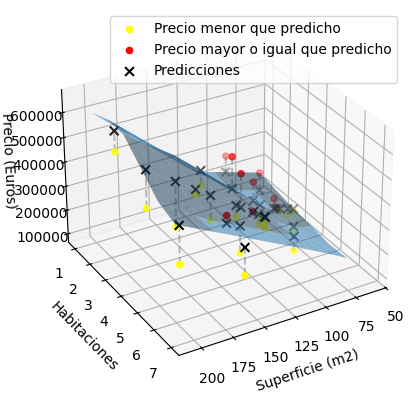

In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

# Crear el pipeline con StandardScaler y HuberRegressor
modeloConCapaOculta = make_pipeline(StandardScaler(),MLPRegressor(hidden_layer_sizes=(10,), activation='relu', solver='lbfgs', max_iter=20000))

# Entrenar el modelo
modeloConCapaOculta.fit(X_train, y_train)

# Calculo las metricas
print('==============================')
print('Metricas con datos de train')
obtenerMetricas(modeloConCapaOculta, X_train, y_train, 'ConCapaOculta')
print('==============================')
print('Metricas con datos de test')
obtenerMetricas(modeloConCapaOculta, X_test, y_test, 'ConCapaOculta', isTrain=False)

visualizar3D(modeloConCapaOculta, X_test, y_test)

----

## 6. Conclusiones

Mostramos las metricas obtenidas para test y para entrenamiento

In [ ]:
print('Metricas entrenamiento')
print(resultadosEntrenamiento)
print('Metricas test')
print(resultadosTest)

Metricas entrenamiento
                  nombre           MSE        r2           MAE
0           monovariable  1.055545e+10  0.583546  69534.930002
1  RegrsionMultivariable  1.026459e+10  0.595022  69089.304425
2      DescensoGradiente  1.026575e+10  0.594976  69007.445211
3       RegresionRobusta  1.069869e+10  0.577895  67934.796315
4          SinCapaOculta  1.026459e+10  0.595022  69089.297605
5          ConCapaOculta  9.796755e+09  0.613480  67127.303784
Metricas test
                  nombre           MSE        r2           MAE
0           monovariable  6.500962e+09  0.460891  63936.474539
1  RegrsionMultivariable  5.586147e+09  0.536754  55256.440825
2      DescensoGradiente  5.591221e+09  0.536334  55629.388698
3       RegresionRobusta  5.027896e+09  0.583049  55158.301298
4          SinCapaOculta  5.586146e+09  0.536754  55256.468237
5          ConCapaOculta  6.624326e+09  0.450661  64748.647538


De estos datos podemos ver que las es la que obtiene un mejor resultado para todas las metrica, MSE y MAE mas bajos y el r2 mas alto; es la regresion robusta Huber. Esto se puede explicar debido a que los valores de entrenamiento contiene bastantes datos atipicos y este tipo de predictores funciona mejor con estos datos evitando que sean tan relevantes en el entrenamiento.

La regresion multivariable y el descenso de gradiente obtiene resultados muy similares dado que una minimiza el coste cuadratrico y la otra se va aproximando a este paulatinamente.

Las redes neuronal sin capa oculta obtiene los mismos valores que la regresion multivariable dado que :
* La red neuronal sin capa oculta se define con hidden_layer_sizes=() y activation='identity'. Esto significa que no hay capas ocultas y la función de activación es lineal.
* La regresión multivariable simple se implementa con LinearRegression(), que también busca una relación lineal entre las variables predictoras y la variable objetivo.

Por lo tanto, ambos modelos están buscando esencialmente la misma relación lineal entre las variables, lo que explica por qué obtienen resultados muy similares.

Por ultimo, un comentario los peores predictores segun las metricas:

* La regresion monovariable intenta obtener un precio apartir de un solo atributo por lo que es normar que las estimaciones sean peores que el resto de predictores que utiliza 2.

* La red neuronal con capa oculta tiene un problema de sobreajuste, obteniendo las mejores metricas para los datos de entrenamiento y las peores para las de test. Esto se podria solucionar cambiando parametros de esta, como el numero de neuronas en la capa oculta, la funcion de activacion, valores de algoritmo entrenamiento que controlen esto, etc.
